# Load Data

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:/Users/User1/capstone-project/data/structured')

In [4]:
os.getcwd()
os.listdir()

['.keep',
 'instacart-aisles.csv',
 'instacart-departments.csv',
 'instacart-orders.csv',
 'instacart-order_products__prior.csv',
 'instacart-order_products__train.csv',
 'instacart-products.csv']

In [5]:
#loading aisles, products and dept csvs
aisles_df= pd.read_csv('instacart-aisles.csv')
products_df= pd.read_csv('instacart-products.csv')
dept_df= pd.read_csv('instacart-departments.csv')

In [6]:
#loading order products csvs
train_df = pd.read_csv('instacart-order_products__prior.csv')
test_df = pd.read_csv('instacart-order_products__train.csv')

In [7]:
orders_df = pd.read_csv( 'instacart-orders.csv')

# Explore dfs

* /Understand the structure of each dataset
* /Explore variable distributions
* /Spot anomalies or issues
* /Insights to guide modelling

### Structure of each

In [8]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders_df['user_id'].agg(['min', 'max'])

min         1
max    206209
Name: user_id, dtype: int64

In [10]:
orders_df['order_id'].agg(['min', 'max'])

min          1
max    3421083
Name: order_id, dtype: int64

In [11]:
orders_df['eval_set'].value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

**remove the test ones cause i dont have the corresponding order products test csv**

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [13]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [15]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
dept_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
dept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [19]:
train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [21]:
test_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [23]:
ordered_products = pd.concat([test_df, train_df], ignore_index=True)

In [24]:
ordered_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [25]:
ordered_products = ordered_products.merge(products_df[['product_id', 'product_name']], on='product_id')

 **add product names to the ordered_products**

In [26]:
ordered_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,1,49302,1,1,Bulgarian Yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,10246,3,0,Organic Celery Hearts
3,1,49683,4,0,Cucumber Kirby
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil


### Variable Distribution

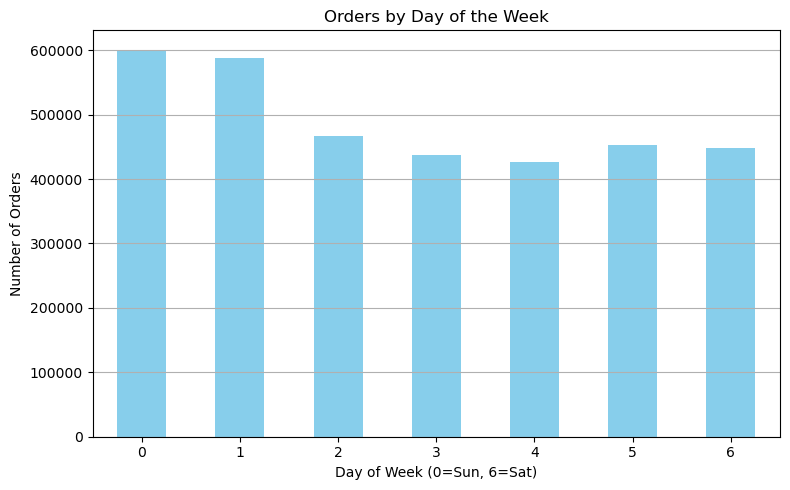

In [27]:
# Get order counts by day of week (0 = Sunday, 6 = Saturday)
dow_counts = orders_df['order_dow'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
dow_counts.plot(kind='bar', color='skyblue')

plt.title('Orders by Day of the Week')
plt.xlabel('Day of Week (0=Sun, 6=Sat)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


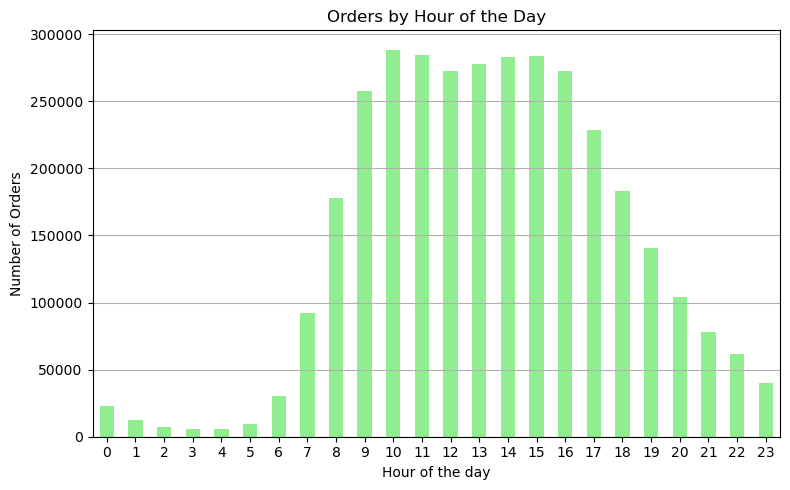

In [28]:
# Get order counts by hour of day 
order_hour_of_day = orders_df['order_hour_of_day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
order_hour_of_day.plot(kind='bar', color='lightgreen')

plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [29]:
orders_df['days_since_prior_order'].value_counts()

days_since_prior_order
30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: count, dtype: int64

In [30]:
orders_df.isnull().sum()


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

**null values probably mean its the first order**

### Anomolies and missing values

In [31]:
aisles_df.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [32]:
dept_df.isnull().sum()

department_id    0
department       0
dtype: int64

In [33]:
products_df.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [34]:
ordered_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
dtype: int64

### Insights

In [35]:
ordered_products['product_name'].value_counts().head(10)


product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: count, dtype: int64

**is there even a difference between organic bananas and reg bananas for the sake of this? should i group them? depends on the associations...if associations are the same then they can be grouped but if the associations for different then we can leave them separate** 

In [36]:
ordered_products['reordered'].value_counts(normalize=True)

reordered
1    0.590062
0    0.409938
Name: proportion, dtype: float64

### Other stuff

In [43]:
# make orders a single observation
orders_fully_listed = ordered_products.groupby('order_id')['product_name'].apply(list).reset_index()
orders_fully_listed.head()


,order_id,product_name
0,1,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M..."
1,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
2,3,[Total 2% with Strawberry Lowfat Greek Straine...
3,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
4,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."


In [44]:
orders_fully_listed['order_size'] = orders_fully_listed['product_name'].apply(len)
orders_fully_listed.head() 

,order_id,product_name,order_size
0,1,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M...",8
1,2,"[Organic Egg Whites, Michigan Organic Kale, Ga...",9
2,3,[Total 2% with Strawberry Lowfat Greek Straine...,8
3,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr...",13
4,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,...",26


In [57]:
orders_fully_listed['order_size'].mean()

10.10707325550502

In [68]:
order_size_count= orders_fully_listed['order_size'].value_counts().sort_index()
popular_sizes = order_size_count[order_size_count > 10000]

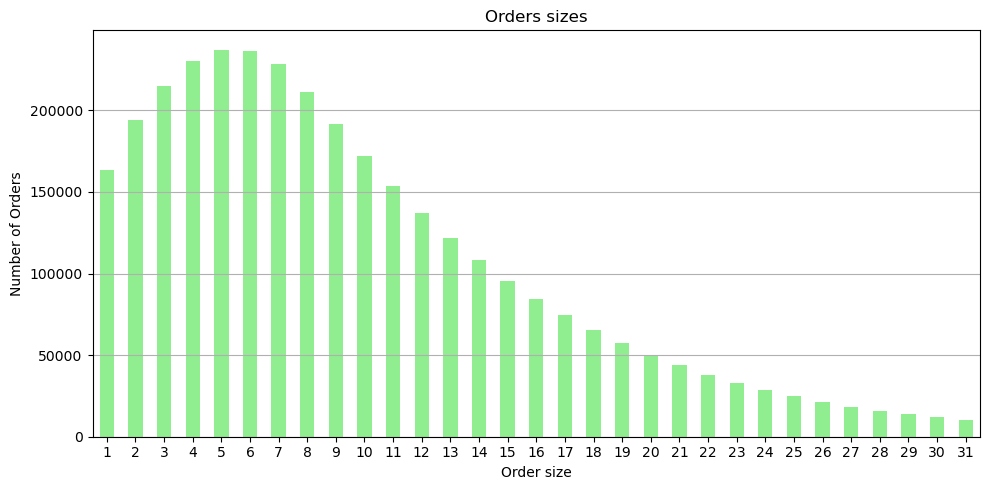

In [69]:
plt.figure(figsize=(10, 5))
popular_sizes.plot(kind='bar', color='lightgreen')

plt.title('Orders sizes')
plt.xlabel('Order size')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
# add products to the orders
orders_with_products = orders_df.merge(orders_fully_listed[['order_id', 'product_name', 'order_size']], on='order_id')

In [77]:
orders_with_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,order_size
0,2539329,1,prior,1,2,8,NaN,"[Soda, Organic Unsweetened Vanilla Almond Milk...",5
1,2398795,1,prior,2,3,7,15.0,"[Soda, Pistachios, Original Beef Jerky, Bag of...",6
2,473747,1,prior,3,3,12,21.0,"[Soda, Original Beef Jerky, Pistachios, Organi...",5
3,2254736,1,prior,4,4,7,29.0,"[Soda, Original Beef Jerky, Pistachios, Organi...",5
4,431534,1,prior,5,4,15,28.0,"[Soda, Original Beef Jerky, Pistachios, Organi...",8
